In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
# Assuming the dataset is stored in a CSV file named "loan_dataset.csv"
loan_df = pd.read_csv("/content/loan-predictionUC.csv (1) (1) (1) (3) (1) (2).xlsx")


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 54: invalid start byte

In [ ]:
!pip install openpyxl

In [ ]:
import openpyxl

In [ ]:
loan_df = pd.read_excel("/content/loan-predictionUC.csv (1) (1) (1) (3) (1) (2).xlsx")

In [ ]:
# Display the first few rows of the dataset
print(loan_df.head())

# Get information about the dataset
print(loan_df.info())

# Summary statistics of numerical columns
print(loan_df.describe())

# Check for any missing values
print(loan_df.isnull().sum())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [ ]:
# Assuming you found missing values, you can either drop them or fill them with appropriate values
# For numerical columns, you can fill missing values with mean or median
loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].median(), inplace=True)
loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0], inplace=True)

# For categorical columns, you can fill missing values with mode
loan_df['Gender'].fillna(loan_df['Gender'].mode()[0], inplace=True)
loan_df['Married'].fillna(loan_df['Married'].mode()[0], inplace=True)
# Repeat this for other categorical columns with missing values

# Recheck if there are any missing values
print(loan_df.isnull().sum())


Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


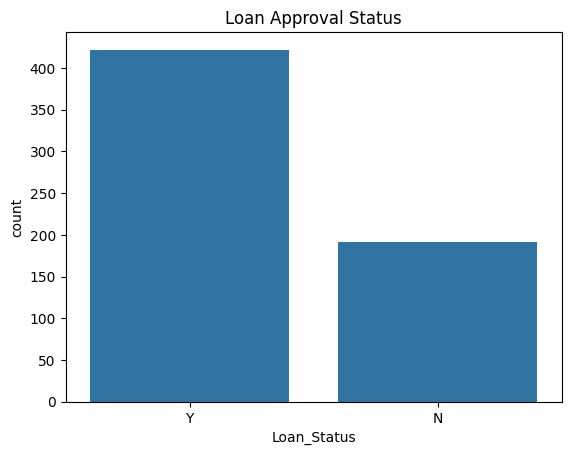

In [ ]:
# Visualize the distribution of Loan_Status
sns.countplot(x='Loan_Status', data=loan_df)
plt.title('Loan Approval Status')
plt.show()

# Visualize the relationship between Loan_Status and other variables
# For example, you can use sns.countplot() or sns.barplot() for categorical variables,
# and sns.boxplot() or sns.scatterplot() for numerical variables
# Repeat this for other variables you want to explore


In [ ]:
# Separate features and target variable
X = loan_df.drop('Loan_Status', axis=1)
y = loan_df['Loan_Status']

# Encode categorical variables
encoder = LabelEncoder()
X_encoded = X.apply(encoder.fit_transform)

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'int', 'str']

In [ ]:
X.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [ ]:
non_numeric_cols = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
X['Dependents'].dtype

dtype('O')

In [ ]:
X.dtypes.value_counts()

int64      4
object     4
float64    4
dtype: int64

In [ ]:
for col in non_numeric_cols:
    X[col] = X[col].astype(str)

In [ ]:
for col in non_numeric_cols:
    X[col] = encoder.fit_transform(X[col])

In [ ]:
# Separate features and target variable
X = loan_df.drop('Loan_Status', axis=1)
y = loan_df['Loan_Status']

# Encode categorical variables
encoder = LabelEncoder()
X_encoded = X.apply(encoder.fit_transform)

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'int', 'str']

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

In [ ]:
X.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [ ]:
non_string_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [ ]:
for col in non_string_cols:
    X[col] = X[col].astype(str)

In [ ]:
X_encoded = X.apply(encoder.fit_transform)

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'int', 'str']

In [ ]:
X.dtypes

Loan_ID              object
Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
ApplicantIncome      object
CoapplicantIncome    object
LoanAmount           object
Loan_Amount_Term     object
Credit_History       object
Property_Area        object
dtype: object

In [ ]:
X = X.apply(lambda x: x.astype(str))

In [ ]:
X_encoded = X.apply(encoder.fit_transform)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
# Use Random Forest Classifier as an example
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predictions on training set
train_preds = model.predict(X_train)
# Predictions on test set
test_preds = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 1.0
Test Accuracy: 0.7642276422764228


In [ ]:
# Confusion matrix for test set
conf_matrix = confusion_matrix(y_test, test_preds)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[18 25]
 [ 4 76]]
